In [ ]:
! pip install numpy==1.26.4

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [7]:
# Display settings
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv("retail_sales_dataset.csv")

# Preview data
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 📊 SECTION 1 — DATASET OVERVIEW

In [8]:
# Shape of dataset
print("Rows & Columns:", df.shape)

# Data types and null values
df.info()

# Statistical summary
df.describe()


Rows & Columns: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## 🧹 SECTION 2 — DATA CLEANING & VALIDATION

In [9]:
# Check Missing Values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [10]:
#Check Duplicate Transactions
df.duplicated(subset=["Transaction ID"]).sum()
print(df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [11]:
# Validate Total Amount Calculation
df["Calculated Amount"] = df["Quantity"] * df["Price per Unit"]

# Check mismatches
df[df["Total Amount"] != df["Calculated Amount"]]

# Drop helper column
df.drop(columns="Calculated Amount", inplace=True)


In [12]:
df


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [13]:
# Check Age Validity
print(df[(df["Age"] < 15) | (df["Age"] > 80)])

Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


## 📈 SECTION 3 — KEY BUSINESS METRICS (KPIs)

In [14]:
total_revenue = df["Total Amount"].sum()
avg_order_value = df["Total Amount"].mean()
avg_quantity = df["Quantity"].mean()
unique_customers = df["Customer ID"].nunique()

print("Total Revenue:", total_revenue)
print("Average Order Value:", round(avg_order_value, 2))
print("Average Quantity per Transaction:", round(avg_quantity, 2))
print("Unique Customers:", unique_customers)
print(df)

Total Revenue: 456000
Average Order Value: 456.0
Average Quantity per Transaction: 2.51
Unique Customers: 1000
     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST100

## SECTION 4 — TIME-BASED SALES ANALYSIS

In [15]:
#  Convert Date Column
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Month_Name"] = df["Date"].dt.strftime("%B")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Month_Name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,May
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,5,May
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,11,November
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,10,October
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,12,December


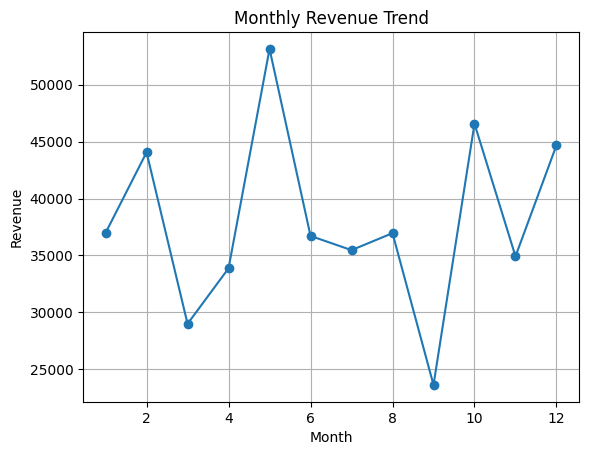

In [16]:
# Monthly Revenue Trend
monthly_revenue = df.groupby("Month")["Total Amount"].sum()

plt.figure()
monthly_revenue.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid()
plt.show()


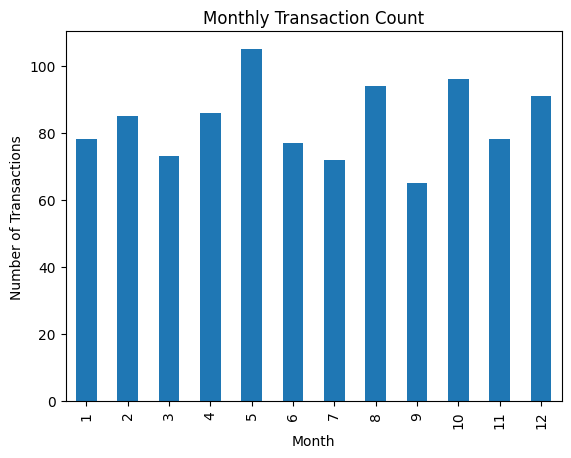

In [17]:
# Monthly Transactions Count
monthly_transactions = df.groupby("Month")["Transaction ID"].count()

plt.figure()
monthly_transactions.plot(kind="bar")
plt.title("Monthly Transaction Count")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()


## 📦 SECTION 5 — PRODUCT CATEGORY ANALYSIS

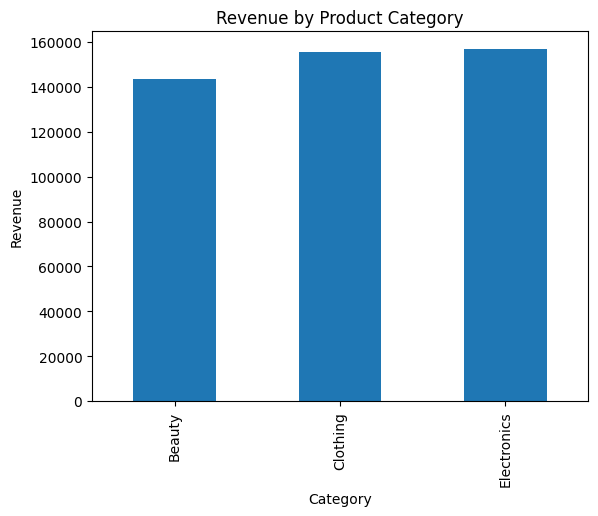

In [18]:
# Revenue by Category
category_revenue = df.groupby("Product Category")["Total Amount"].sum()

plt.figure()
category_revenue.plot(kind="bar")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()


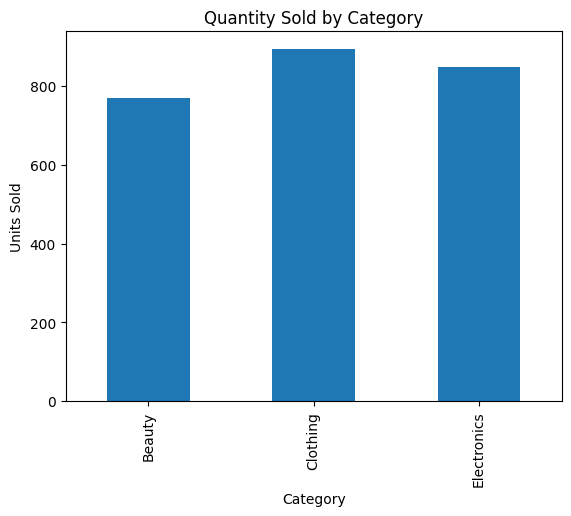

In [19]:
# Quantity Sold by Category
category_quantity = df.groupby("Product Category")["Quantity"].sum()

plt.figure()
category_quantity.plot(kind="bar")
plt.title("Quantity Sold by Category")
plt.xlabel("Category")
plt.ylabel("Units Sold")
plt.show()


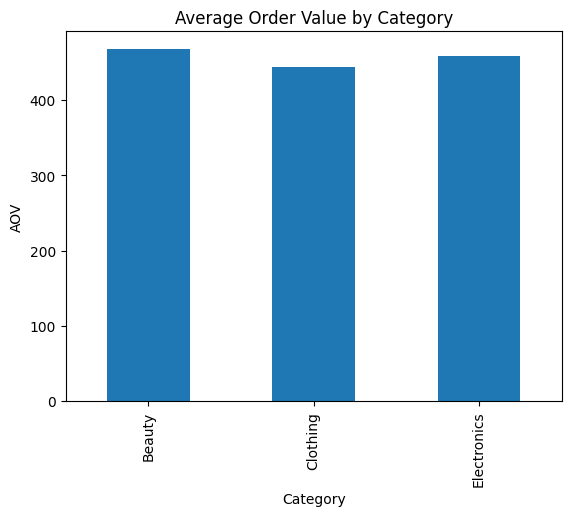

In [20]:
# Average Order Value by Category
category_aov = df.groupby("Product Category")["Total Amount"].mean()

plt.figure()
category_aov.plot(kind="bar")
plt.title("Average Order Value by Category")
plt.xlabel("Category")
plt.ylabel("AOV")
plt.show()


## 👥 SECTION 6 — CUSTOMER DEMOGRAPHIC ANALYSIS

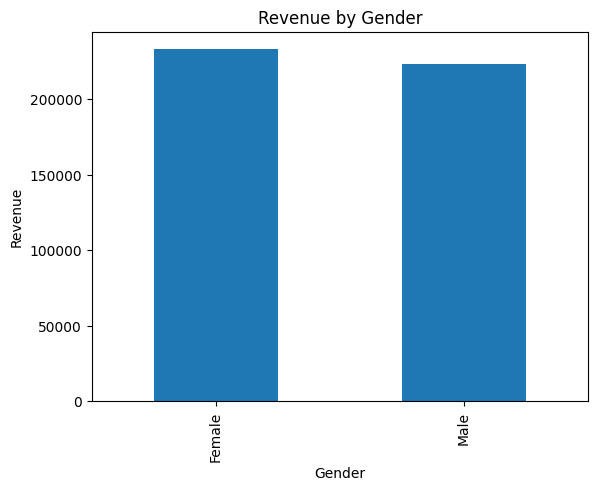

In [21]:
# Gender-wise Revenue
gender_revenue = df.groupby("Gender")["Total Amount"].sum()

plt.figure()
gender_revenue.plot(kind="bar")
plt.title("Revenue by Gender")
plt.xlabel("Gender")
plt.ylabel("Revenue")
plt.show()


In [22]:
# Age Group Analysis
bins = [18, 25, 35, 45, 55, 65, 80]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "65+"]

df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels)
print(df)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  Month Month_Name Age Group  
0           3

C:\Users\unive\AppData\Local\Temp\ipykernel_2164\2581582696.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_revenue = df.groupby("Age Group")["Total Amount"].sum()


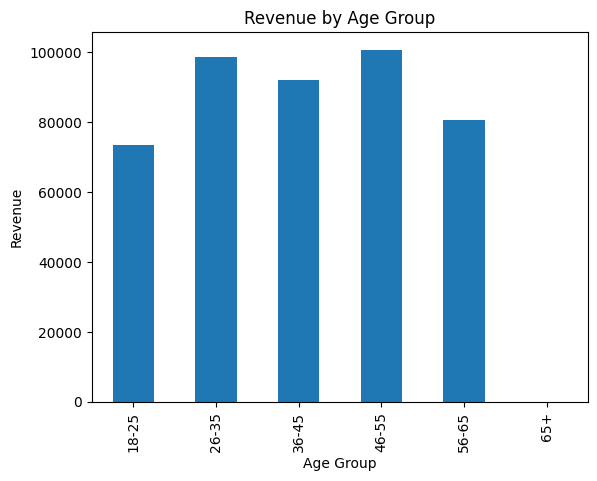

In [23]:
age_group_revenue = df.groupby("Age Group")["Total Amount"].sum()

plt.figure()
age_group_revenue.plot(kind="bar")
plt.title("Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Revenue")
plt.show()


# # 🔁 SECTION 7 — CUSTOMER BEHAVIOR & RETENTION

In [24]:
# Repeat vs One-time Customers
customer_orders = df.groupby("Customer ID")["Transaction ID"].count()

repeat_customers = (customer_orders > 1).sum()
one_time_customers = (customer_orders == 1).sum()

print("Repeat Customers:", repeat_customers)
print("One-time Customers:", one_time_customers)


Repeat Customers: 0
One-time Customers: 1000


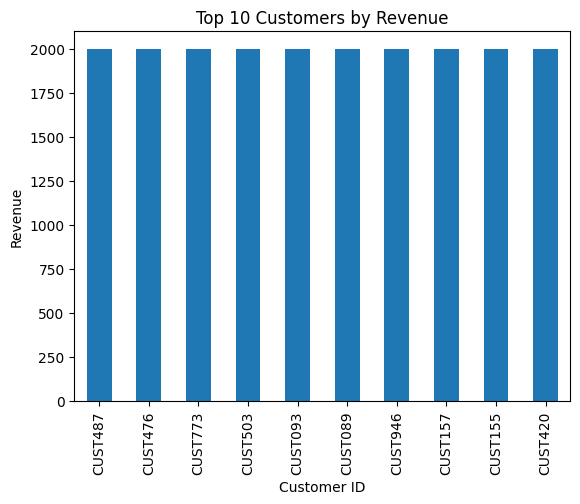

In [25]:
# Top 10 Customers by Revenue
top_customers = df.groupby("Customer ID")["Total Amount"].sum().sort_values(ascending=False).head(10)

plt.figure()
top_customers.plot(kind="bar")
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.show()


## 📉 SECTION 8 — REVENUE CONCENTRATION (80/20 RULE)

In [26]:
customer_revenue = df.groupby("Customer ID")["Total Amount"].sum().sort_values(ascending=False)

top_10_percent_count = int(0.1 * len(customer_revenue))
top_10_percent_revenue = customer_revenue.head(top_10_percent_count).sum()

percentage = (top_10_percent_revenue / total_revenue) * 100

print(f"Top 10% customers generate {round(percentage, 2)}% of total revenue")
    

Top 10% customers generate 38.2% of total revenue


## 🧠 SECTION 9 — KEY INSIGHTS

* Electronics has highest revenue per transaction

* Customers aged 26–35 contribute maximum revenue

* Revenue is concentrated among repeat customers

* Clothing has high volume but lower AOV

## 🧾 SECTION 10 — BUSINESS RECOMMENDATIONS

* Introduce loyalty program for high-value customers

* Bundle beauty products to increase AOV

* Target 26–35 age group via promotions

* Upsell electronics to repeat buyers

## 🧠 SECTION 11 — RFM ANALYSIS

In [27]:
# Prepare RFM Table
import numpy as np

# Reference date (last date in dataset)
reference_date = df["Date"].max()

rfm = df.groupby("Customer ID").agg({
    "Date": lambda x: (reference_date - x.max()).days,
    "Transaction ID": "count",
    "Total Amount": "sum"
}).reset_index()

rfm.columns = ["Customer ID", "Recency", "Frequency", "Monetary"]

rfm.head()


,Customer ID,Recency,Frequency,Monetary
0,CUST001,38,1,150
1,CUST002,308,1,1000
2,CUST003,353,1,30
3,CUST004,225,1,500
4,CUST005,240,1,100


In [29]:
# Create RFM Scores (1–4)
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])

rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])

rfm["F_Score"] = rfm["Frequency"].apply(
    lambda x: 1 if x == 1 else 2 if x == 2 else 3 if x == 3 else 4
)

rfm["RFM_Score"] = (
    rfm["R_Score"].astype(str) +
    rfm["F_Score"].astype(str) +
    rfm["M_Score"].astype(str)
)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,R_Score,M_Score,F_Score,RFM_Score
0,CUST001,38,1,150,4,3,1,413
1,CUST002,308,1,1000,1,4,1,114
2,CUST003,353,1,30,1,1,1,111
3,CUST004,225,1,500,2,3,1,213
4,CUST005,240,1,100,2,2,1,212


## 💰 SECTION 12 — CUSTOMER LIFETIME VALUE (CLV)

In [30]:
# CLV= Average Order Value * Purchase Frequency
rfm["Average_Order_Value"] = rfm["Monetary"] / rfm["Frequency"]
rfm["CLV"] = rfm["Average_Order_Value"] * rfm["Frequency"]

rfm.sort_values("CLV", ascending=False).head()


,Customer ID,Recency,Frequency,Monetary,R_Score,M_Score,F_Score,RFM_Score,Average_Order_Value,CLV
487,CUST487,161,1,2000,3,4,1,314,2000.0,2000.0
476,CUST476,125,1,2000,3,4,1,314,2000.0,2000.0
773,CUST773,162,1,2000,3,4,1,314,2000.0,2000.0
503,CUST503,68,1,2000,4,4,1,414,2000.0,2000.0
92,CUST093,171,1,2000,3,4,1,314,2000.0,2000.0


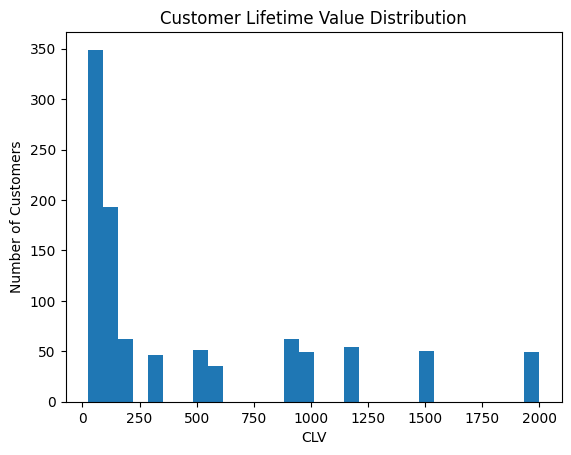

In [31]:
# CLV Distribution
plt.figure()
plt.hist(rfm["CLV"], bins=30)
plt.title("Customer Lifetime Value Distribution")
plt.xlabel("CLV")
plt.ylabel("Number of Customers")
plt.show()
